# Decomposing Time Series Data into Trend and Seasonality

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. Decomposition provides a useful abstact model for thinking about time series generally and for better understand  problems during time series analysis and forecasting.

After completing this tutorial, you will know:
- the time series decomposition method of analysis and how it can help with forecasting
- how to automatically decompose time series data in Python
- how to decmopose additive and multiplicative time series problems and plot the results

## Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.
- `systematic` : components of the time series that have consistency or recurrence and can be described and modeled
- `non-systemic` : components of the time series that cannot be directly modeled

A given time series is thought to consist of three systematic components:
- `level` : the average value in the series
- `trend` : the increasing or decreasing value in the series
- `seasonality` : the repeating short-term cycle in the series
- `noise`: the random variation in the series

# Combining Time Series Components

A series is thought to be an aggregate or combination of these four components. All series have a level and noise. The trend and seasonality components are optional.

### Additive Model

$$ y(t) = level + trend + seasonality + noise$$
An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitube (height of cycles).

### Multiplicative Model

$$y(t) = level \times trend \times seasonality \times noise$$
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

### Decomposition as a Tool

Decomposition is primarily used for time series analysis, and as an analysis tool, it can be used to infor forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model seletion, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series an as additive or multiplicative model. Real-world problems are messy and noisey. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

## Automatic Time Series Decomposition

The `statsmodels` library provides an implementation of the naive or classical, decomposition method ina function called `seasonal_decompose()`. It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The `seasonal_decompose()` function returns a result object. The result object contains arrays to access four pieces of data from the decomposition. For example, the snippet below shows how to decompose a series into `trend`, `seasonal`, and `residual` components assuming an additive model.

The result object provides access to the trend and seasonal series as arrays. It also provides access to the residuals, which are the time series after the trend and seasonal components are removed. Finally, the original data is also stored.

### Additive Decomposition

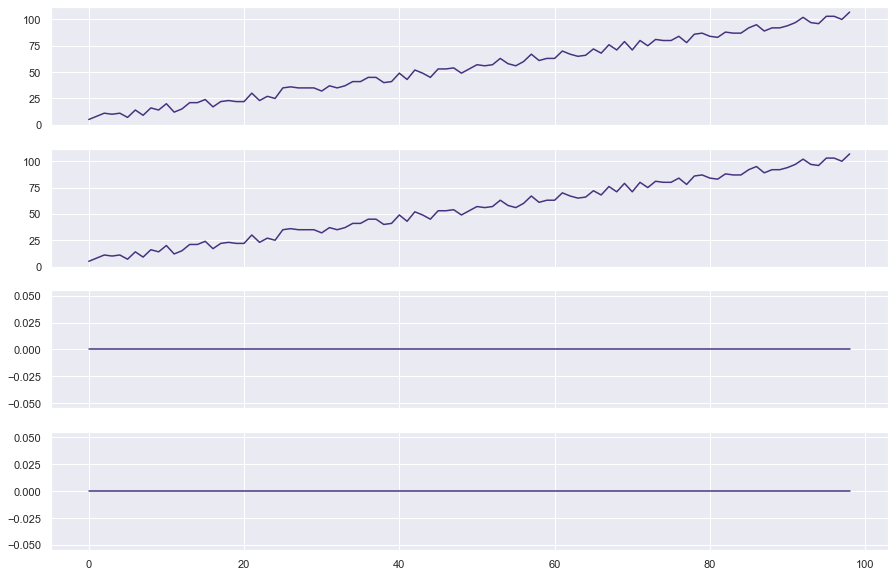

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rand
import seaborn as sns; sns.set(palette='viridis')

series = [i + rand.randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10), sharex=True)
ax1.plot(result.observed)
ax2.plot(result.trend)
ax3.plot(result.seasonal)
ax4.plot(result.resid)
plt.show()

The residual plot shows zero. This is a good example where the naive or classical decomposition was not able to separate the noise that we added from the linear trend.

### Multiplicative Decomposition

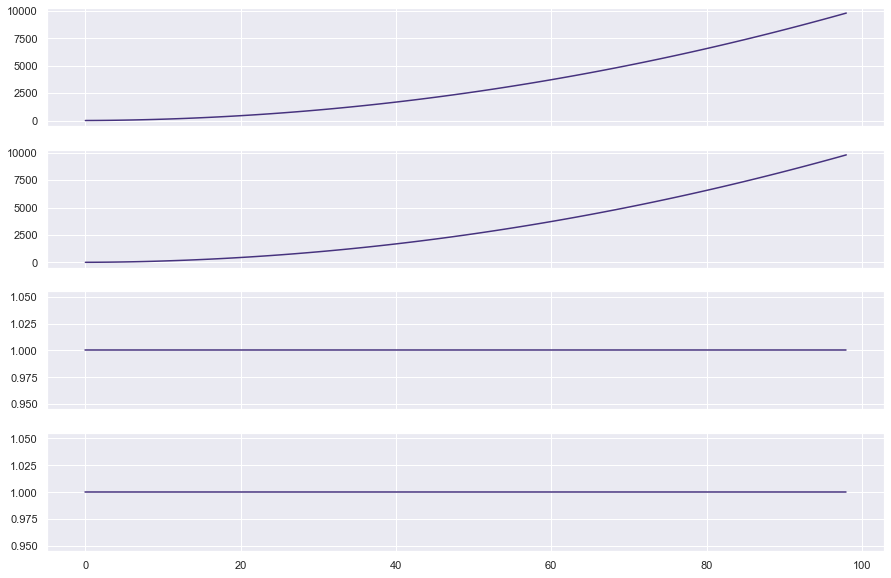

In [51]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10), sharex=True)
ax1.plot(result.observed)
ax2.plot(result.trend)
ax3.plot(result.seasonal)
ax4.plot(result.resid)
plt.show()

Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

Again, it is important to treat decomposition as a potentially useful analysis tool, but to consider exploring the many different ways it could be applied for your problem, such as on data after it has been transformed or on residual model errors.

# Airline Passengers Dataset

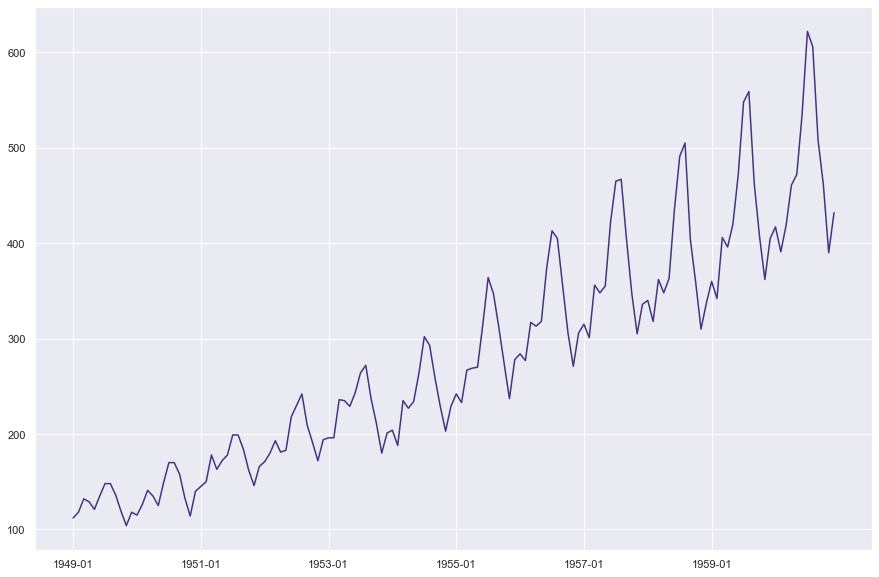

In [70]:
series = pd.read_csv('./res/data/airline_passengers.csv', header=0, index_col=0)
yearly = 12 * 2 * np.arange(6)
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticks(yearly)
ax.plot(series)
plt.show()

Reviewing the line plot, it suggests that there may be a linear trend, but it is hard to be sure from just the plot. There is also seasonality, but the amplitude of the cycles appears to be increasing, suggesting that it is multiplicative.

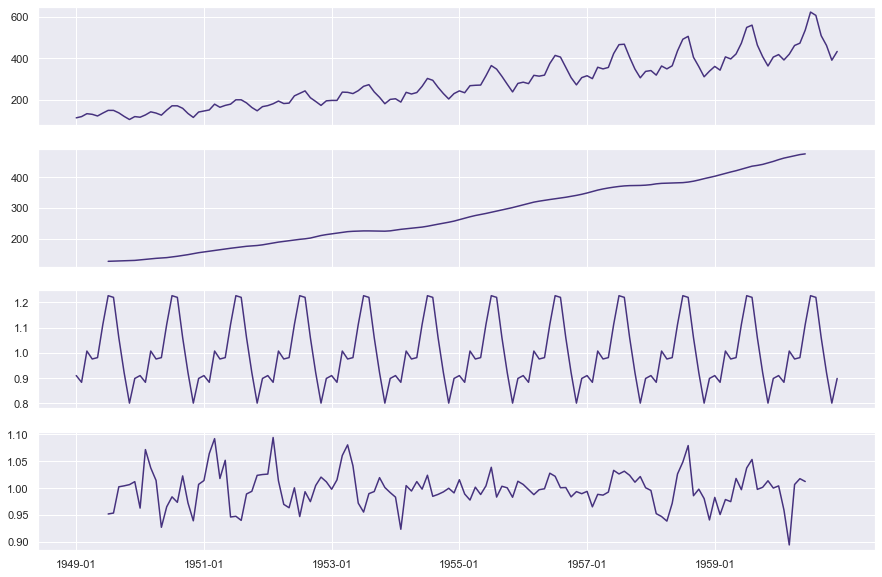

In [76]:
result = seasonal_decompose(series, model='multiplicative', period=12)
# the periodicity has to be defined; because this is a monthly, 12 seemed appropriate

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(15,10), sharex=True)

ax1.plot(result.observed)
ax1.set_xticks(yearly)
ax2.plot(result.trend)
ax2.set_xticks(yearly)
ax3.plot(result.seasonal)
ax3.set_xticks(yearly)
ax4.plot(result.resid)
ax4.set_xticks(yearly)
plt.show()